In [ ]:
pip install tensorflow scikit-learn matplotlib seaborn


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values (0-255 → 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training set:", x_train.shape, y_train.shape)
print("Testing set:", x_test.shape, y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 574s 3us/step
Training set: (50000, 32, 32, 3) (50000, 10)
Testing set: (10000, 32, 32, 3) (10000, 10)


In [ ]:
model = models.Sequential([
    # First Conv + Pool
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    # Second Conv + Pool
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    # Flatten
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),   # Prevent overfitting

    # Output layer
    layers.Dense(10, activation="softmax")
])

# Compile model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.2,
    verbose=2
)



Epoch 1/15
625/625 - 61s - 98ms/step - accuracy: 0.3904 - loss: 1.6689 - val_accuracy: 0.5095 - val_loss: 1.3840
Epoch 2/15
625/625 - 66s - 106ms/step - accuracy: 0.5214 - loss: 1.3374 - val_accuracy: 0.5775 - val_loss: 1.2058
Epoch 3/15
625/625 - 46s - 73ms/step - accuracy: 0.5765 - loss: 1.2015 - val_accuracy: 0.6217 - val_loss: 1.0840
Epoch 4/15
625/625 - 80s - 128ms/step - accuracy: 0.6162 - loss: 1.1018 - val_accuracy: 0.6436 - val_loss: 1.0221
Epoch 5/15
625/625 - 81s - 130ms/step - accuracy: 0.6367 - loss: 1.0405 - val_accuracy: 0.6637 - val_loss: 0.9605
Epoch 6/15
625/625 - 43s - 68ms/step - accuracy: 0.6551 - loss: 0.9843 - val_accuracy: 0.6632 - val_loss: 0.9592
Epoch 7/15
625/625 - 44s - 70ms/step - accuracy: 0.6704 - loss: 0.9394 - val_accuracy: 0.6766 - val_loss: 0.9206
Epoch 8/15
625/625 - 81s - 129ms/step - accuracy: 0.6821 - loss: 0.9032 - val_accuracy: 0.6835 - val_loss: 0.8914
Epoch 9/15
625/625 - 44s - 70ms/step - accuracy: 0.6948 - loss: 0.8635 - val_accuracy: 0.686

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)


Test Accuracy: 0.7102000117301941


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


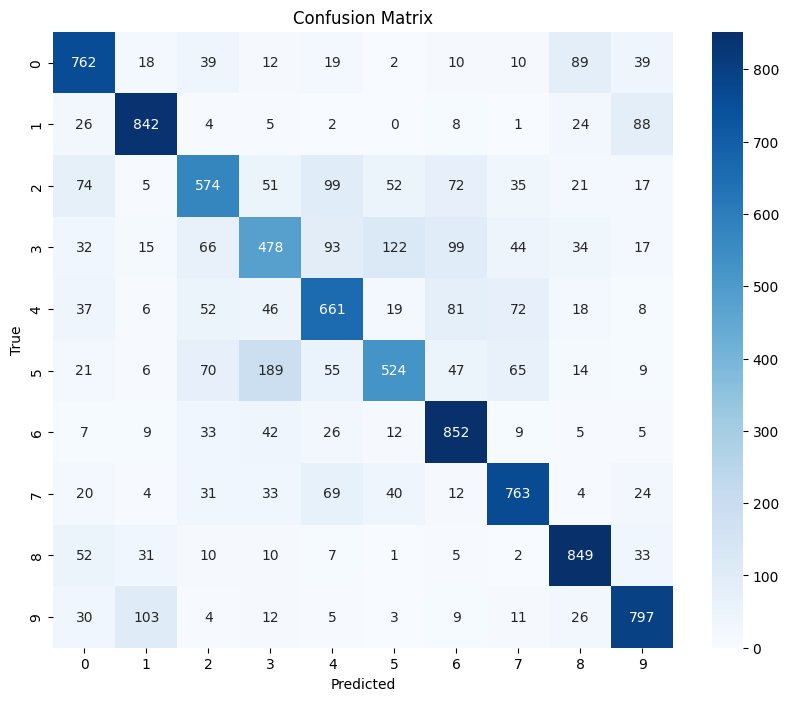

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1000
           1       0.81      0.84      0.83      1000
           2       0.65      0.57      0.61      1000
           3       0.54      0.48      0.51      1000
           4       0.64      0.66      0.65      1000
           5       0.68      0.52      0.59      1000
           6       0.71      0.85      0.78      1000
           7       0.75      0.76      0.76      1000
           8       0.78      0.85      0.81      1000
           9       0.77      0.80      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [ ]:
# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Precision, Recall, F1-Score
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))


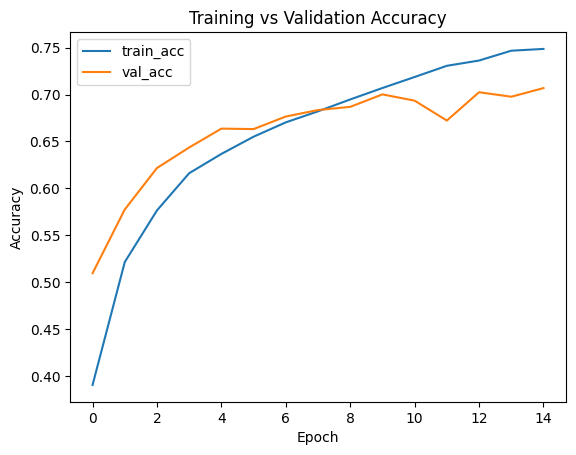

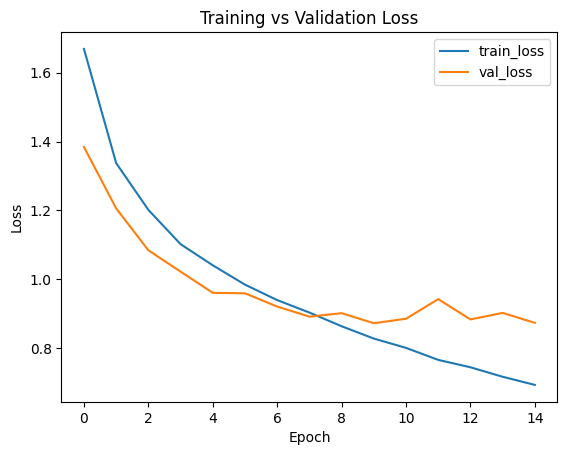

In [ ]:
# Accuracy plot
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Loss plot
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


In [ ]:
layers.Conv2D(128, (3,3), activation="relu"),
layers.MaxPooling2D((2,2)),


(<MaxPooling2D name=max_pooling2d_4, built=True>,)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=15,
    validation_data=(x_test, y_test),
    verbose=2
)


Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 - 79s - 100ms/step - accuracy: 0.6036 - loss: 1.1377 - val_accuracy: 0.6958 - val_loss: 0.9127
Epoch 2/15
782/782 - 78s - 99ms/step - accuracy: 0.6197 - loss: 1.0921 - val_accuracy: 0.6824 - val_loss: 0.9410
Epoch 3/15
782/782 - 78s - 99ms/step - accuracy: 0.6298 - loss: 1.0667 - val_accuracy: 0.7033 - val_loss: 0.8459
Epoch 4/15
782/782 - 78s - 99ms/step - accuracy: 0.6357 - loss: 1.0460 - val_accuracy: 0.6977 - val_loss: 0.8812
Epoch 5/15
782/782 - 78s - 99ms/step - accuracy: 0.6416 - loss: 1.0314 - val_accuracy: 0.6787 - val_loss: 0.9478
Epoch 6/15
782/782 - 77s - 99ms/step - accuracy: 0.6438 - loss: 1.0195 - val_accuracy: 0.6810 - val_loss: 0.9314
Epoch 7/15
782/782 - 78s - 99ms/step - accuracy: 0.6531 - loss: 1.0073 - val_accuracy: 0.7080 - val_loss: 0.8617
Epoch 8/15
782/782 - 80s - 103ms/step - accuracy: 0.6508 - loss: 0.9967 - val_accuracy: 0.7103 - val_loss: 0.8329
Epoch 9/15
782/782 - 78s - 100ms/step - accuracy: 0.6535 - loss: 0.9912 - val_accuracy: 0.7233 - val_loss